In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [2]:
!ls

 notebook.tex	  output_6_2.png   output_6_6.png   surveydatatable.tex
 output_3_1.png   output_6_3.png   output_6_7.png   survey.ipynb
 output_6_0.png   output_6_4.png   output_6_8.png  'Umfrage zu ArgoData.csv'
 output_6_1.png   output_6_5.png   output_6_9.png  'Unbenannt 1.odt'


In [17]:
df = pd.read_csv('./Umfrage zu ArgoData.csv')
del df['Zeitstempel']
df.T

,0,1,2,3,4,5,6,7,8,9,10,11
"Ich kann mir sehr gut vorstellen, ArgoData regelmäßig zu nutzen.",4,3,2,3,1,4,3,2,1,4,1,4
Ich empfinde ArgoData als unnötig komplex.,1,2,2,1,3,1,1,3,3,1,1,1
Ich empfinde ArgoData als einfach zu nutzen.,4,3,5,5,3,5,5,3,4,5,5,4
"Ich denke, dass ich Hilfestellung bei der Benutzung brauchen würde, um ArgoData zu nutzen.",1,4,1,3,2,4,1,3,3,3,1,2
"Ich finde, dass die Funktionen (Karte, Steuerung, Anzeige von Daten) gut integriert sind.",4,4,4,5,3,5,5,4,4,5,4,5
"Ich finde, dass es in ArgoData zu viele Inkonsistenzen gibt.",3,2,3,2,2,2,1,3,3,2,1,1
"Ich kann mir vorstellen, dass die meisten Leute ArgoData schnell zu beherrschen lernen.",4,4,5,5,4,5,5,3,4,4,5,5
Ich empfinde die Bedienung als sehr umständlich.,2,2,2,2,1,2,1,2,3,1,2,1
Ich habe mich bei der Nutzung von ArgoData sehr sicher gefühlt.,4,5,5,4,4,4,5,3,2,5,4,4
"Ich musste eine Menge Dinge lernen, bevor ich mit ArgoData arbeiten konnte.",1,1,1,3,1,1,1,2,4,1,1,1


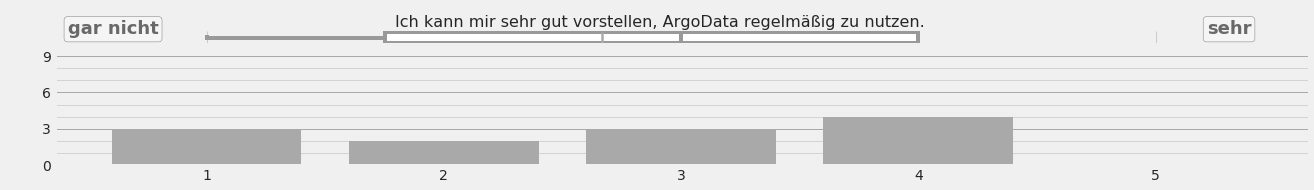

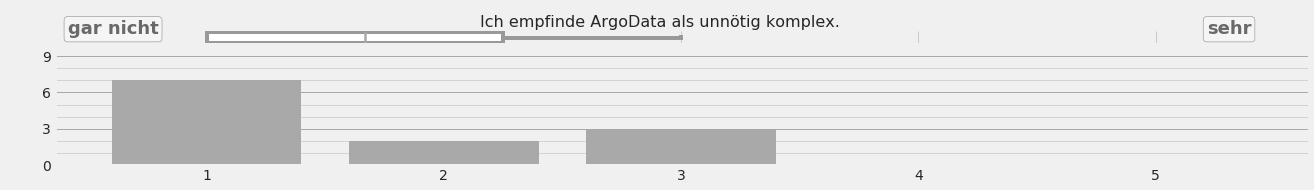

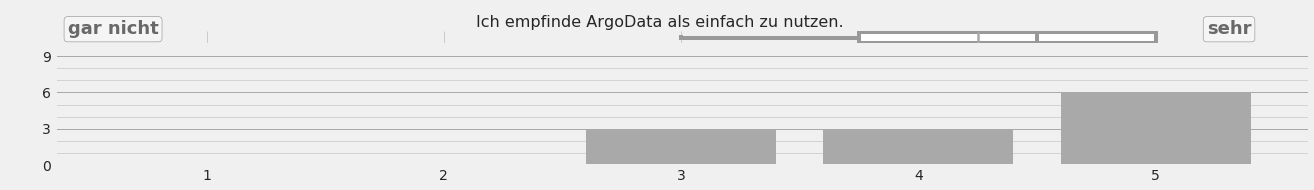

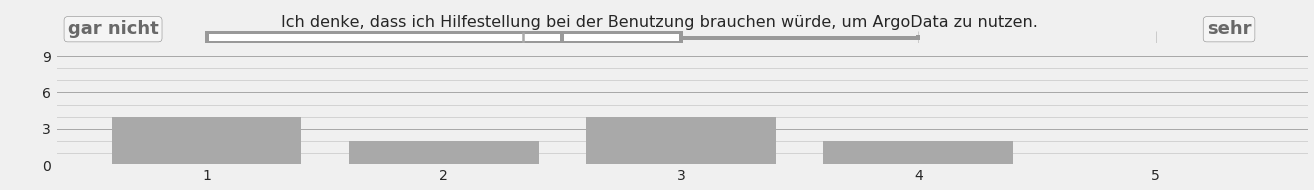

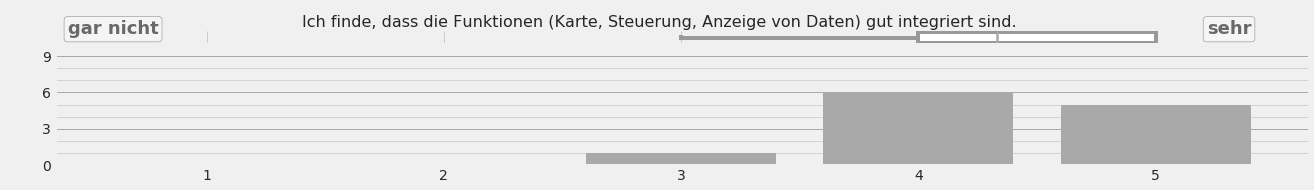

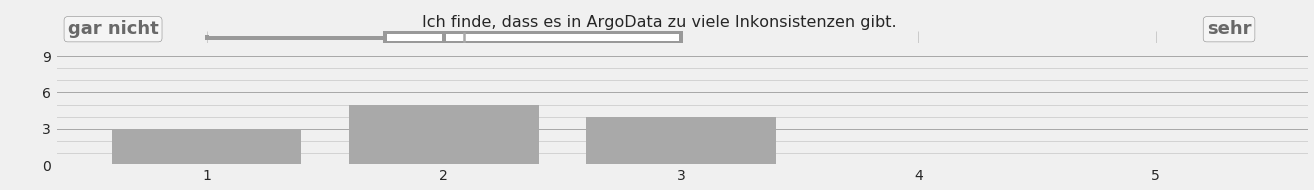

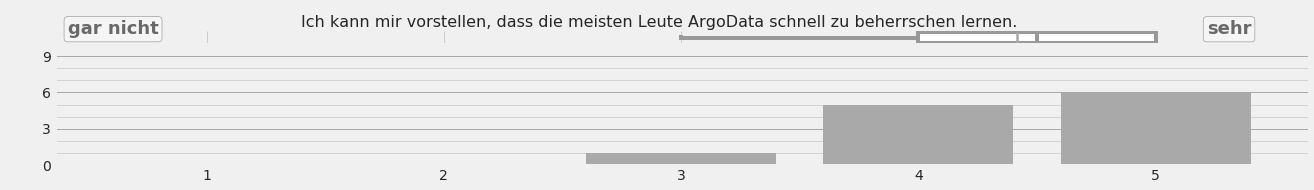

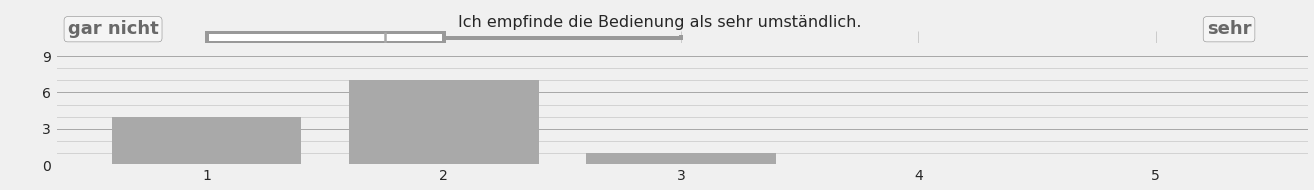

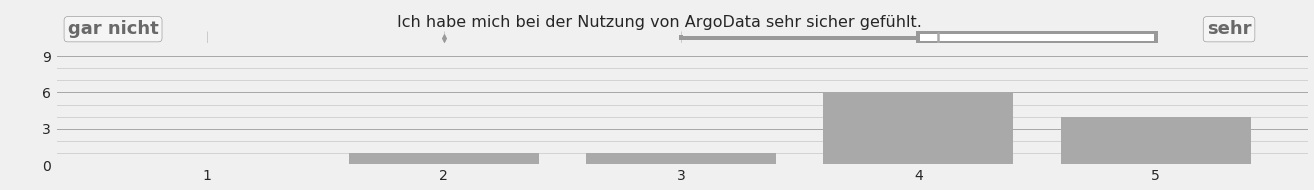

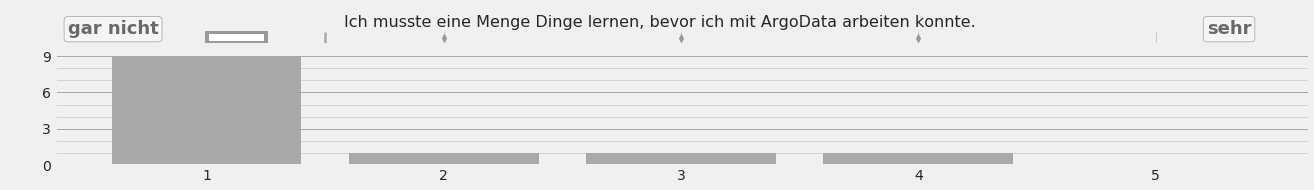

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.ticker import AutoMinorLocator
from matplotlib.font_manager import FontProperties

plt.style.use('fivethirtyeight')

def subplot(data):
    bins=[1,2,3,4,5]
    y = [data.value_counts()[x] if x in data.value_counts() else 0 for x in bins]

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.1, .86)})
    f.set_figwidth(20)
    f.set_figheight(2.3)

    whisker = sns.boxplot(data.values, 
                          ax=ax_box,showmeans=True, 
                          meanline=True, color="white", 
                          meanprops=dict(color='darkgrey', linestyle='-', linewidth=2.5,))
    ax_hist.bar(bins, y, color="darkgrey")
    ax_box.set(yticks=[])

    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=False)

    f.suptitle(data.name, fontsize=16)   
    
    left, width = -.06, 1
    bottom, height = -0.09, .33
    right = left + width
    top = bottom + height
    p = patches.Rectangle(
    (left, bottom), width, height,
    fill=False, transform=ax_hist.transAxes, clip_on=False
    )
      
    font = FontProperties()
    font.set_weight('bold')
    font.set_size(18)  
    bbox = dict(facecolor='whitesmoke', edgecolor='grey', pad=0.2, boxstyle='round')
    ax_hist.text(right, height, 'sehr',
        horizontalalignment='center',
        verticalalignment='top',
        transform=ax.transAxes,
        fontproperties=font,
        color = 'dimgray',
        backgroundcolor='whitesmoke', 
        bbox=bbox)
    ax_hist.text(left, height, 'gar nicht',
        horizontalalignment='center',
        verticalalignment='top',
        transform=ax.transAxes,
        fontproperties=font,
        color = 'dimgray',
        backgroundcolor='whitesmoke', 
        bbox=bbox)
    
    plt.yticks(np.arange(0, 9+1, 3.0))
    ax_hist.set_ylim([0,9])
    ax_hist.minorticks_on()
    ax_hist.xaxis.grid(False)
    ax_hist.yaxis.grid(b=False, which='minor', color='lightgray', linestyle='-')
    ax_hist.yaxis.set_minor_locator(AutoMinorLocator(3))
    ax_hist.yaxis.grid(b=True, which='major', color='darkgray', linestyle='-', markersize=1)
    ax_box.xaxis.grid(True)    

for col in df:
    subplot(df[col])

In [13]:
df.mean(axis=0)

Ich kann mir sehr gut vorstellen, ArgoData regelmäßig zu nutzen.                              2.666667
Ich empfinde ArgoData als unnötig komplex.                                                    1.666667
Ich empfinde ArgoData als einfach zu nutzen.                                                  4.250000
Ich denke, dass ich Hilfestellung bei der Benutzung brauchen würde, um ArgoData zu nutzen.    2.333333
Ich finde, dass die Funktionen (Karte, Steuerung, Anzeige von Daten) gut integriert sind.     4.333333
Ich finde, dass es in ArgoData zu viele Inkonsistenzen gibt.                                  2.083333
Ich kann mir vorstellen, dass die meisten Leute ArgoData schnell zu beherrschen lernen.       4.416667
Ich empfinde die Bedienung als sehr umständlich.                                              1.750000
Ich habe mich bei der Nutzung von ArgoData sehr sicher gefühlt.                               4.083333
Ich musste eine Menge Dinge lernen, bevor ich mit ArgoData arbeiten konnt

In [14]:
df.std(axis=0)

Ich kann mir sehr gut vorstellen, ArgoData regelmäßig zu nutzen.                              1.230915
Ich empfinde ArgoData als unnötig komplex.                                                    0.887625
Ich empfinde ArgoData als einfach zu nutzen.                                                  0.866025
Ich denke, dass ich Hilfestellung bei der Benutzung brauchen würde, um ArgoData zu nutzen.    1.154701
Ich finde, dass die Funktionen (Karte, Steuerung, Anzeige von Daten) gut integriert sind.     0.651339
Ich finde, dass es in ArgoData zu viele Inkonsistenzen gibt.                                  0.792961
Ich kann mir vorstellen, dass die meisten Leute ArgoData schnell zu beherrschen lernen.       0.668558
Ich empfinde die Bedienung als sehr umständlich.                                              0.621582
Ich habe mich bei der Nutzung von ArgoData sehr sicher gefühlt.                               0.900337
Ich musste eine Menge Dinge lernen, bevor ich mit ArgoData arbeiten konnt

In [15]:
df.max(axis=0)

Ich kann mir sehr gut vorstellen, ArgoData regelmäßig zu nutzen.                              4
Ich empfinde ArgoData als unnötig komplex.                                                    3
Ich empfinde ArgoData als einfach zu nutzen.                                                  5
Ich denke, dass ich Hilfestellung bei der Benutzung brauchen würde, um ArgoData zu nutzen.    4
Ich finde, dass die Funktionen (Karte, Steuerung, Anzeige von Daten) gut integriert sind.     5
Ich finde, dass es in ArgoData zu viele Inkonsistenzen gibt.                                  3
Ich kann mir vorstellen, dass die meisten Leute ArgoData schnell zu beherrschen lernen.       5
Ich empfinde die Bedienung als sehr umständlich.                                              3
Ich habe mich bei der Nutzung von ArgoData sehr sicher gefühlt.                               5
Ich musste eine Menge Dinge lernen, bevor ich mit ArgoData arbeiten konnte.                   4
dtype: int64